**Import Library**

In [ ]:

#Mengimport library NumPy dan memberikan nama singkatan yaitu np
import numpy as np
#Mengimport library pandas dan memberikan alias pd
import pandas as pd
#Mengimport library matplotlib dan memberikan alias plt
import matplotlib.pyplot as plt
 #Mengimport library seaborn dan memberikan alias sns
import seaborn as sns
 #Mengimport fungsi train_test_split untuk membagi dataset menjadi subset pelatihan dan pengujian
from sklearn.model_selection import train_test_split
#Untuk menskalakan fitur ke range yang diinginkan
from sklearn.preprocessing import MinMaxScaler
#Mengimport layer Sequential dari TensorFlow Keras
from tensorflow.keras.models import Sequential
#Mengimport layer Dense dari TensorFlow Keras untuk menentukan lapisan-lapisan dalam model neural network
from tensorflow.keras.layers import Dense
#Mengimport layer LinearRegression dari scikit-learn untuk memodelkan regresi linear
from sklearn.linear_model import LinearRegression
#mengukur kinerja model regresi dengan menghitung skor R-squared
from sklearn.metrics import r2_score, confusion_matrix, classification_report

Membaca file yang telah diupload yaitu car_puchasing.csv

In [ ]:
#membaca file csv dari lokasi yang diinginkan dan menggunakan encoding ISO-8859-1
df = pd.read_csv('/car_purchasing.csv', encoding='ISO-8859-1')
#Setelah data dibaca, data akan ditampilkan secara ringkas
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


**CAR PURCHASING**

---


Dari data penjualan mobil di atas, terdapat beberapa fitur antara lain costumer name, customer e-mail, country, gender, age, annual salary, credit card debt, net worth, dan car purchase amount. Dataset yang ringkas di atas kemudian dimodifikasi tanpa menghapus data-data yang ada sebelumnya.

In [ ]:
#Dataset (df) akan dimodifikasi dengan menghapus nama-nama yang disebutkan seperti gender, email, dll, tanpa menghapus data yang telah ada sebelumnya.
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

In [ ]:
#memberikan gambaran lima baris pertama dari Dataset yang telah dimodifikasi sebelumnya.
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


Fitur-fitur di atas kemudian dihitung untuk mengetahi jumlah nilai null di setiap kolom, untuk membantu menemukan data yang hilang di dalam dataset setelah modifikasi, dan mengetahui jenis data yang digunakan yaitu float64.

In [ ]:
#Menampilkan informasi umum dari Dataset
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Data kemudian dibuat plot dengan sumbu x yaitu fitur 'annual salary' dan sumbu y-nya 'credit card debt'. Selain itu judul dari plotnya adalah 'the corr between credit card debt and annual Salary'.

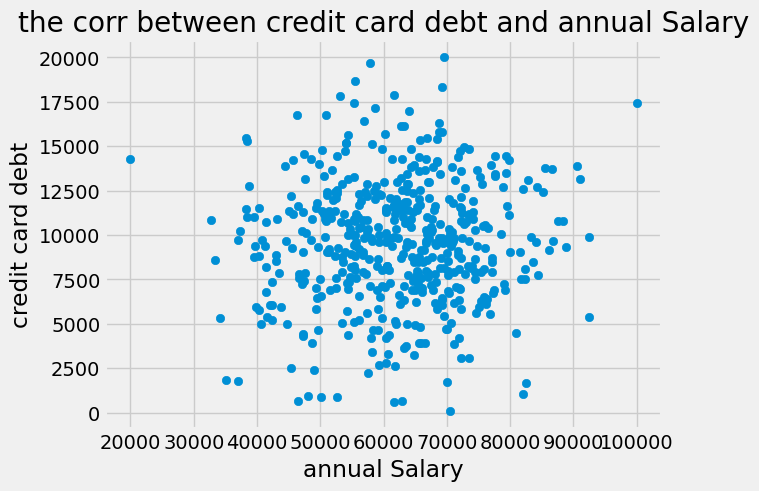

In [ ]:
#Membuat plot dengan 2 fitur yaitu 'annual salary' dan 'credit card debt'
plt.scatter(df['annual Salary'] , df['credit card debt'])
#Memberikan label pada sumbu x, yaitu 'annual Salary'
plt.xlabel('annual Salary')
#Memberikan label pada sumbu y, yaitu 'credit card debt'.
plt.ylabel('credit card debt')
#Memberikan judul pada plot
plt.title('the corr between credit card debt and annual Salary')
#Manmpilkan plot
plt.show()

Karena di dalam data set memiliki banyak fitur, maka dibuatlah plot untuk mengetahui hubungan atau keterkaitan dari masing-masing fitur tersebut. Sebagai contoh dari salah satu hubungan fitur dari plot di bawah, yaitu car purchasing amaount terhadap age.

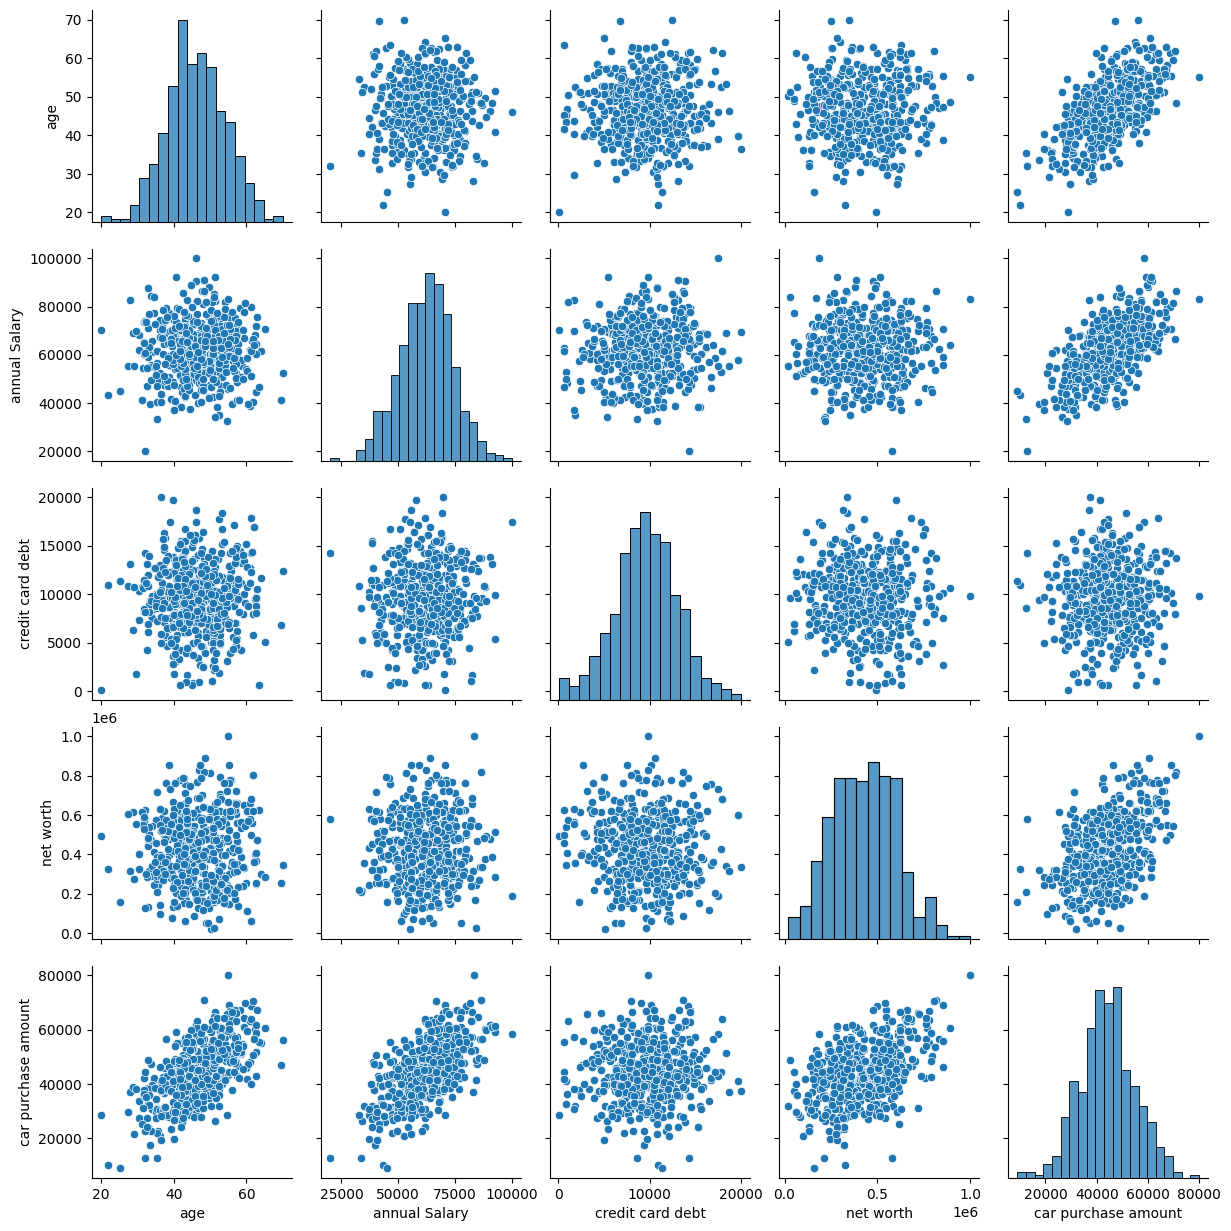

In [ ]:
# melihat hubungan antarfitur dalam Dataset dan korelasi atau pola yang mungkin ada antara pasangan variabel
sns.pairplot(df)

In [ ]:
#Memilih semua baris dari Dataset df dan semua kolom kecuali kolom terakhir
X = df.iloc[:, :-1]
#Memilih semua baris dari Dataset df dan hanya kolom terakhir
y = df.iloc[:, -1]

In [ ]:
#Membuat objek MinMaxScaler yang akan digunakan untuk penskalaan
scale = MinMaxScaler()
#Fitur-fitur diproses sehingga memiliki skala antara 0 dan 1.
X = scale.fit_transform(X)
#Melakukan penskalaan y dan mengubahnya menjadi matriks 2D
y = scale.fit_transform(y.reshape(-1, 1))
#Membagi data menjadi 2, yaitu set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
#Mengimport kelas LinearRegression dari scikit-learn
lreg = LinearRegression()
#Membuat objek
lreg.fit(X_train, y_train)
#Menulis train score dan test score
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999816568915
Test score 0.9999999785787534


In [ ]:
#prediksi yang dihasilkan oleh model regresi linear dari dataset yang diuji
y_pred = lreg.predict(X_test)

In [ ]:
#Membuat Model ANN
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])
#Mengompilasi Model
ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])

#Melatih model menggunakan data pelatihan (X_train dan y_train) selama 50 epoch dengan membagi data validasi sebesar 20%
history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 25ms/step - loss: 0.1203 - mean_absolute_error: 0.3182 - val_loss: 0.0713 - val_mean_absolute_error: 0.2398
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0431 - mean_absolute_error: 0.1754 - val_loss: 0.0202 - val_mean_absolute_error: 0.1143
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0147 - mean_absolute_error: 0.0975 - val_loss: 0.0100 - val_mean_absolute_error: 0.0785
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0897 - val_loss: 0.0110 - val_mean_absolute_error: 0.0853
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0917 - val_loss: 0.0101 - val_mean_absolute_error: 0.0813
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0863 - val_loss: 0.0092 - val_mean_absolute_error: 0.0753
Epoch 7/50
10/10 [=========

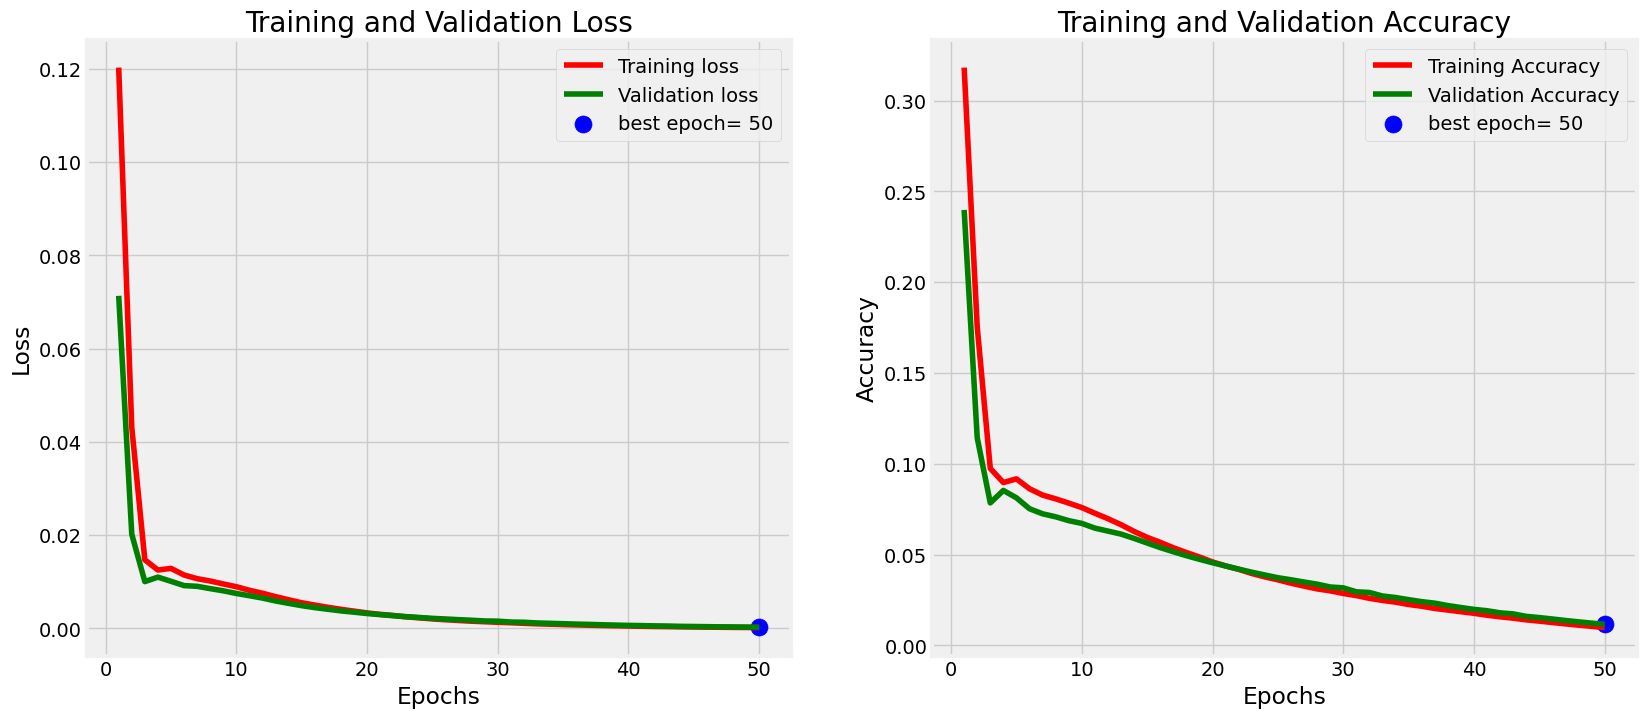

In [ ]:
#Mendapatkan histori pelatihan dan validasi
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
#Mencari nilai maks dan minimum dari dataset, di mana val_loss paling rendah dan val_acc paling tinggi terjadi.
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
#Membuat daftar epoch untuk sumbu x dan label untuk poin paling rendah pada grafik loss dan paling tinggi pada grafik akurasi
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

#Membuat ukuran dari plot yang ingin ditampilkan
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

#Menggambar grafik untuk plot pertama
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Menggambar grafik untuk plot kedua
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# prediksi yang dihasilkan oleh ANN
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
#Menghitung nilai R2
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9999999785787534


In [ ]:
#Mengukur nilai yang diuji dan mengukur tingkat errornya
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.3986e-04 - mean_absolute_error: 0.0101


[0.00023985540610738099, 0.010118519887328148]

In [ ]:
#prediksi terhadap suatu input baru
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 35ms/step


array([[276363.12]], dtype=float32)

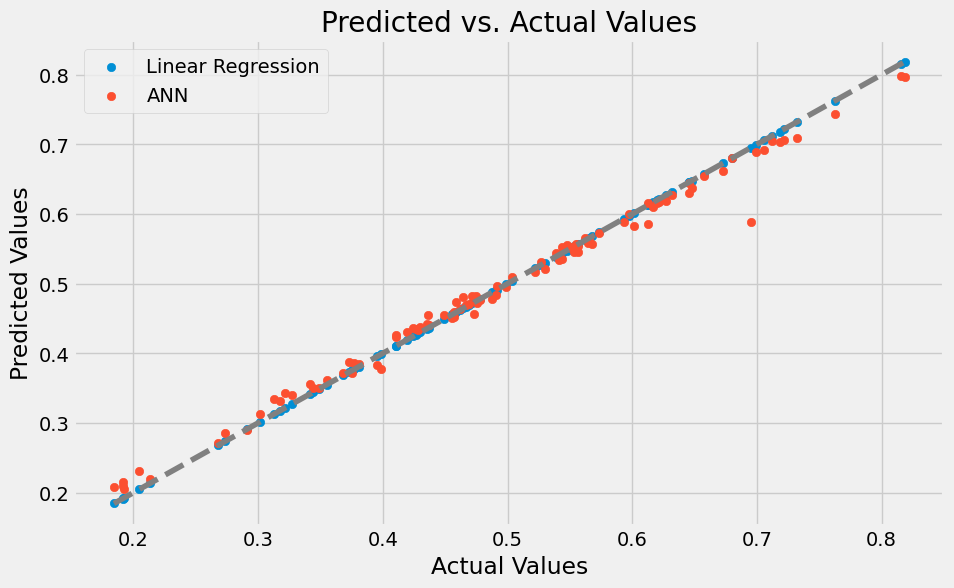

In [ ]:
#Mengatur ukuran gambar plot
plt.figure(figsize=(10, 6))
#membuat plot dimana sumbu x merupakan nilai aktual dan sumbu y nilai prediksi
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
#Menambahkan garis diagonal dengan gaya putus-putus berwarna abu-abu
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

## **Confussion Matrix**

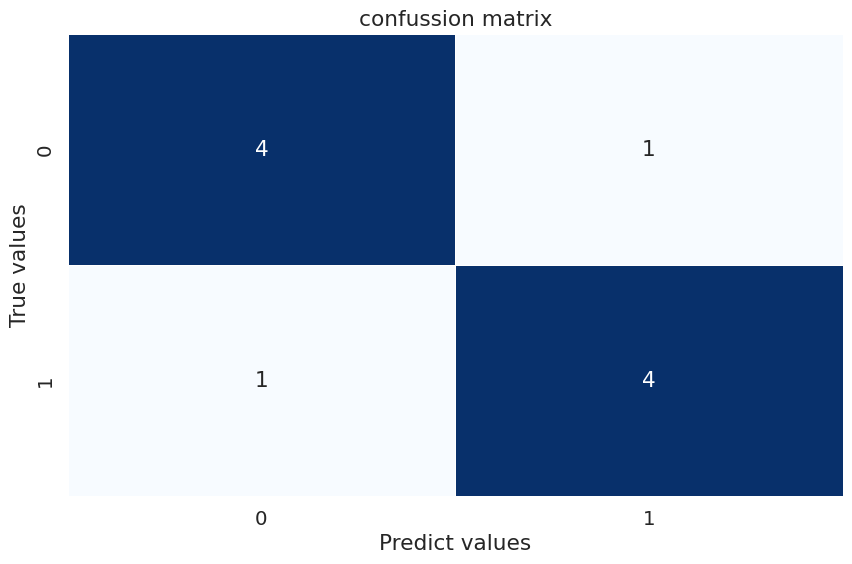

In [ ]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menggambar COnfussion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predict values')
plt.ylabel('True values')
plt.title('confussion matrix')
plt.show()

## **Classification Report**

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

